In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.stats as ss

import scipy.optimize as opt

import sys
sys.path.insert(0, '../util/')
from util_os import util_os

In [7]:
datapath = '/home/jw1624/H1-merian/csvs/breathingModes/'

## Set params

In [3]:
cdmgals = util_os.getGalaxies()[0]

In [4]:
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [5]:
matplotlib.rc('font', family='serif')
rcParams['axes.linewidth'] = 3
rcParams['xtick.major.width'] = 3
rcParams['xtick.major.size'] = 12
rcParams['ytick.major.width'] = 3
rcParams['ytick.major.size'] = 12

rcParams['xtick.minor.width'] = 2
rcParams['xtick.minor.size'] = 8
rcParams['ytick.minor.width'] = 2
rcParams['ytick.minor.size'] = 8

rcParams['font.family'] = 'serif'

rcParams['text.usetex'] = False

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.transparent'] = False

# Individual Galaxy Figures

## Three Panel Figure
R_hm, sSFR and sigma as functions of time

In [6]:
cdmgals

array([431, 442, 468, 492, 502, 515, 523, 556, 568, 569, 571, 597, 613,
       615, 618, 634])

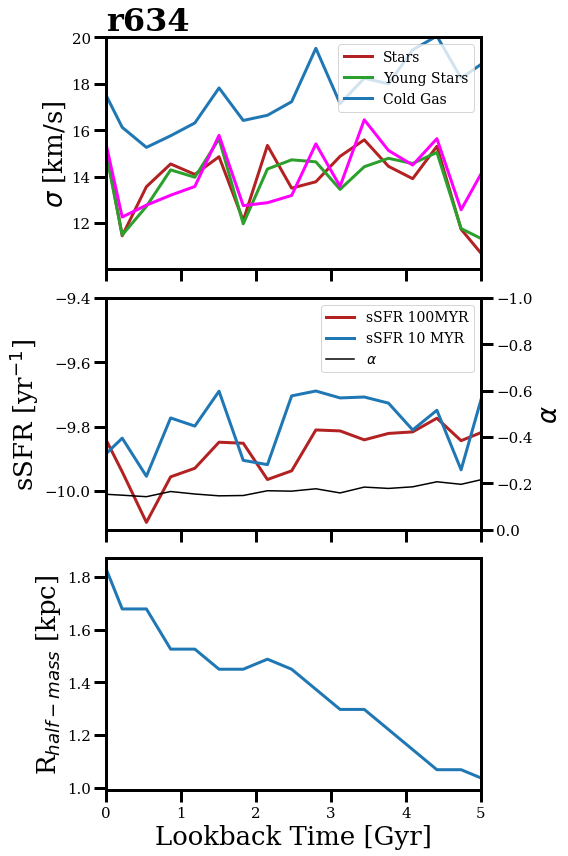

In [16]:
gal = cdmgals[15]
tlim = 5

data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

fig, axs = plt.subplots(3,1, facecolor='w', figsize=(8,12), sharex=True)

axs[0].set_title('r'+str(gal), fontsize=32, weight='bold', loc='left')

# get lookback time 
tlookback = abs(data['t'] - max(data['t']))

tmask = tlookback<tlim+1

# top panel: sigma
sigAS = data['sigma_allstars_global'][tmask]
sigASlos= data['sigma_allstars_los'][tmask]

sigYS = data['sigma_youngstar_global'][tmask]
sigYSlos= data['sigma_youngstar_los'][tmask]

sigCG = data['sigma_coldgas_global'][tmask]
sigCGlos= data['sigma_coldgas_los'][tmask] 

sigHa = data['sigma_gasNearYS_los'][tmask]

axs[0].plot(tlookback[tmask], sigASlos,linewidth=3, color='firebrick')
axs[0].plot(tlookback[tmask], sigYSlos,linewidth=3, color='tab:green')
axs[0].plot(tlookback[tmask], sigCGlos,linewidth=3, color='tab:blue')
axs[0].plot(tlookback[tmask], sigHa, linewidth=3, color='magenta')

axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].set_ylabel(r'$\sigma$ [km/s]', fontsize=26)
axs[0].legend(['Stars', 'Young Stars', 'Cold Gas'], fontsize=14, loc=1)
axs[0].set_xlim([0,tlim])

# middle panel: sSFR
ssfr10 = data['sSFR_10'][tmask]
ssfr100= data['sSFR_100'][tmask]

l1=axs[1].plot(tlookback[tmask], ssfr100, color='firebrick', linewidth=3)
l2=axs[1].plot(tlookback[tmask], ssfr10, color='tab:blue', linewidth=3)

axs[1].tick_params(axis='both', which='major', labelsize=15)    
axs[1].set_ylabel(r'sSFR [yr$^{-1}$]', fontsize=26)

# adding alpha to middle panel 
axalpha = axs[1].twinx() 
l3=axalpha.plot(tlookback[tmask], data['alpha'][tmask], c='k')

axalpha.tick_params(axis='both', which='major', labelsize=15)
axalpha.set_ylabel(r'$\alpha$', fontsize=26)
axalpha.set_ylim([0,-1])

axs[1].legend(l1+l2+l3,['sSFR 100MYR', 'sSFR 10 MYR', r'$\alpha$'], fontsize=14, loc=1)

# Bottom panel: half-mass radius
Rhm = data['R_halfmass'][tmask]
Rhls= data['R_halflight_s'][tmask]
Rhlc= data['R_halflight_c'][tmask]

axs[2].plot(tlookback[tmask], Rhm, linewidth=3)
#axs[2].plot(tlookback[tmask], Rhls, linewidth=1, marker='^')
#axs[2].plot(tlookback[tmask], Rhlc, linewidth=1, marker='^')

axs[2].tick_params(axis='both', which='major', labelsize=15)
axs[2].set_ylabel(r'R$_{half-mass}$ [kpc]', fontsize=26)
axs[2].set_xlabel('Lookback Time [Gyr]', fontsize=26)

##
axs[0].set_ylim(top=20)
axs[1].set_ylim(top=-9.4)
#axs[2].set_ylim(top=17)

plt.tight_layout()

#plt.savefig('../figures/breathingModes/threePanel/r'+str(gal)+'_t'+str(tlim)+'.png')

# sSFR and sigma individual

Text(-9.773682819446275, 17.007731716606905, '$\\rho=$-0.0')

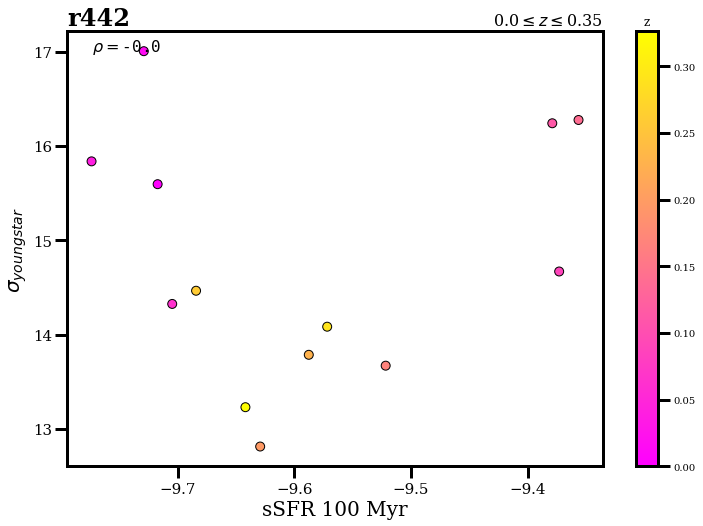

In [118]:
gal = cdmgals[1]
zmin = 0.00
zmax = 0.35

fig = plt.figure(figsize=(12,8), facecolor='w')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

x = np.array(data['sSFR_100'])
y = np.array(data['sigma_youngstar_los'])
z = np.array(data['z'])

zmask = z>=zmin
x = x[zmask]
y = y[zmask]
z = z[zmask]

zmask = z<=zmax
x = x[zmask]
y = y[zmask]
z = z[zmask]

p = ss.spearmanr(x,y)[0]

plt.scatter(x,y, c=z, s=80, ec='k', cmap='spring')

plt.title('r'+str(gal), fontsize=24, weight='bold', loc='left')
plt.title(str(zmin)+r'$\leq z \leq$'+str(zmax), fontsize=16, loc='right')

plt.xlabel('sSFR 100 Myr', fontsize=20)
plt.ylabel(r'$\sigma_{youngstar}$', fontsize=20)

cax = plt.colorbar()
cax.ax.set_title('z')

plt.text(s=r'$\rho=$'+str(p)[:4], x=min(x), y=max(y), fontfamily='monospace', fontsize=16)

#plt.savefig('../figures/breathingModes/ssfr100_SigYS_indiv/r'+str(gal)+'_'+str(zmin)+'z'+str(zmax)+'.png')

## Scatter sSFR and sigma; sSFR and Rhm

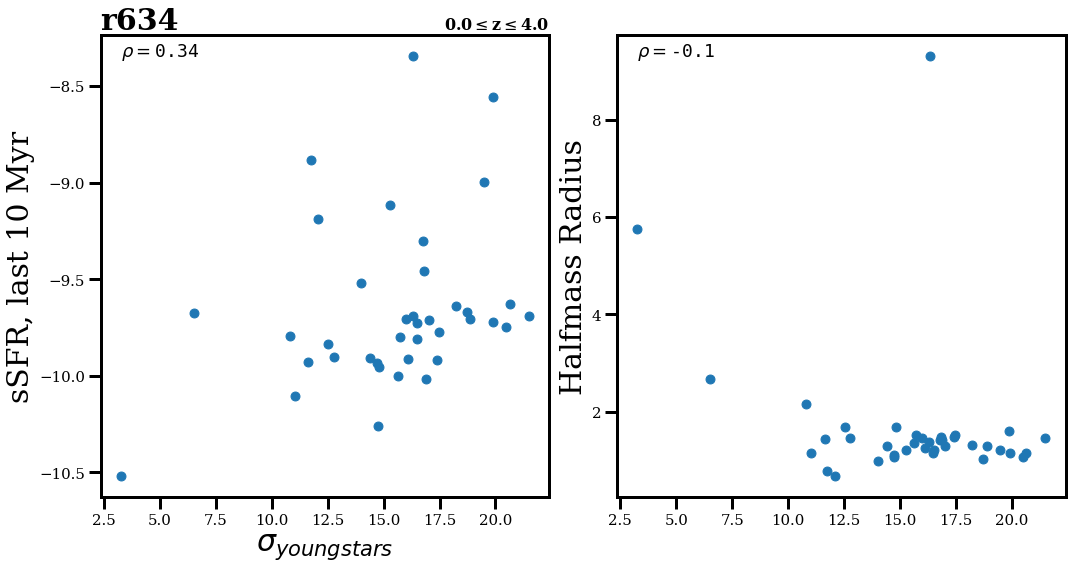

In [20]:
gal = cdmgals[15]
zmin = 0.0
zmax = 4.0

fig, axs = plt.subplots(1,2, figsize=(15,8), facecolor='w')

axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)

data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')
zmaskmin = data['z']>=zmin

x = data['sigma_youngstar'][zmaskmin]
yl = data['sSFR_10'][zmaskmin]
yr = data['R_halfmass'][zmaskmin]
c = data['z'][zmaskmin]

zmaskmax = c<=zmax
x = x[zmaskmax]
yl = yl[zmaskmax]
yr = yr[zmaskmax]
c = c[zmaskmax]

rsl = ss.spearmanr(x,yl)[0]
rsr = ss.spearmanr(x,yr)[0]

axs[0].scatter(x, yl, s=80)

axs[0].set_title('r'+str(gal), fontsize=30, weight='bold', loc='left')
axs[0].set_title(str(zmin)[:3]+r'$\leq$z$\leq$'+str(zmax)[:3], fontsize=16, weight='bold', loc='right')

axs[0].set_xlabel(r'$\sigma_{youngstars}$', fontsize=30)
axs[0].set_ylabel('sSFR, last 10 Myr', fontsize=30)

axs[0].text(s=r'$\rho=$'+str(rsl)[:4], x=min(x)-0.0, y=max(yl)-0.00, fontsize=18, fontfamily='monospace')

# right 
axs[1].scatter(x, yr, s=80)

axs[1].set_ylabel('Halfmass Radius', fontsize=30)

axs[1].text(s=r'$\rho=$'+str(rsr)[:4], x=min(x)-0.0, y=max(yr)-0.00, fontsize=18, fontfamily='monospace')

plt.tight_layout()

ff = '../figures/breathingModes/ssfr10_SigYS_indiv/'+str(zmin)[:3]+'z'+str(zmax)[:3]+'_r'+str(gal)+'.png'
#plt.savefig(ff)

# Group Figures

## Scatter sSFR_100 and log10 R_halfmass (population)

## sigma and sSFR

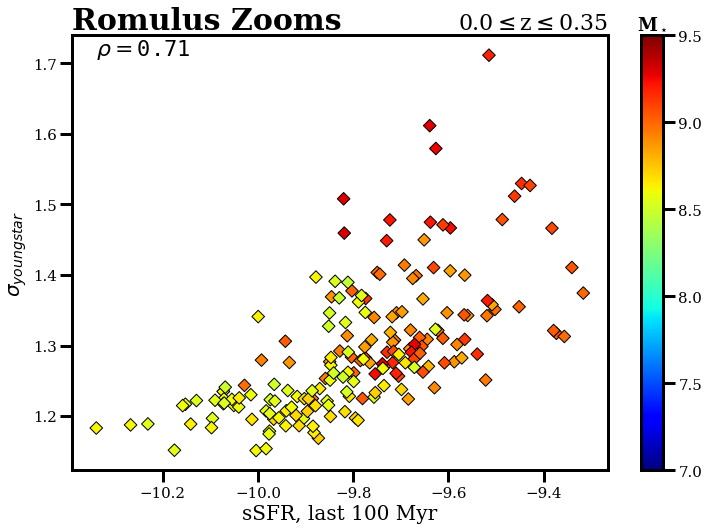

In [19]:
zmin = 0.00
zmax = 0.35

mmin = 6
mmax = 12
fig = plt.figure(facecolor='w', figsize=(12,8))

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=13)

# get data
sigGas = []
ssfr = []
mall = []
for idx,gal in enumerate(cdmgals):
    if gal in [431,615]: continue
    data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

    x = data['sSFR_100'][data['z'] <= zmax].to_numpy()
    y = data['sigma_coldgas_los'][data['z'] <= zmax].to_numpy()
    #y = data['sigma_youngstar_los'][data['z'] <= zmax].to_numpy()
    c = np.log10(data['M_star'][data['z'] <= zmax].to_numpy())
    z = data['z'][data['z']<= zmax].to_numpy()
    
    x = x[z>=zmin]
    y = y[z>=zmin]
    c = c[z>=zmin]
    
    x = x[c>=mmin]
    y = y[c>=mmin]
    c = c[c>=mmin]
    
    x = x[c<=mmax]
    y = y[c<=mmax]
    c = c[c<=mmax]
    
    for i,_ in enumerate(x):
        ssfr.append(x[i])
        sigGas.append(y[i])
        mall.append(c[i])
        
rs = ss.spearmanr(sigGas, ssfr)[0]
        
# scatter 
sigGas = np.log10(sigGas)
plt.scatter(ssfr, sigGas, c=mall, cmap='jet', s=80, ec='k', marker='D', vmin=7.0, vmax=9.5)

plt.xlabel('sSFR, last 100 Myr', fontsize=20)
plt.ylabel(r'$\sigma_{youngstar}$', fontsize=20)

#plt.yscale('log')

clb = plt.colorbar()
clb.ax.set_title(r'M$_\star$', fontsize=18, weight='bold')
clb.ax.tick_params(labelsize=15)

plt.title('Romulus Zooms', fontsize=30, weight='bold', loc='left')
plt.title(str(zmin)+r'$\leq$z$\leq$'+str(zmax), fontsize=22, loc='right')

plt.text(x=min(ssfr), y=max(sigGas), s=r'$\rho=$'+str(rs)[:4], fontsize=22, fontfamily='monospace')

ff = '../figures/breathingModes/ssfr100_SigYS_group/'+str(zmin)[:3]+'z'+str(zmax)[:3]+'.png'
#plt.savefig(ff)

In [73]:
max(mall)

8.604890637721832

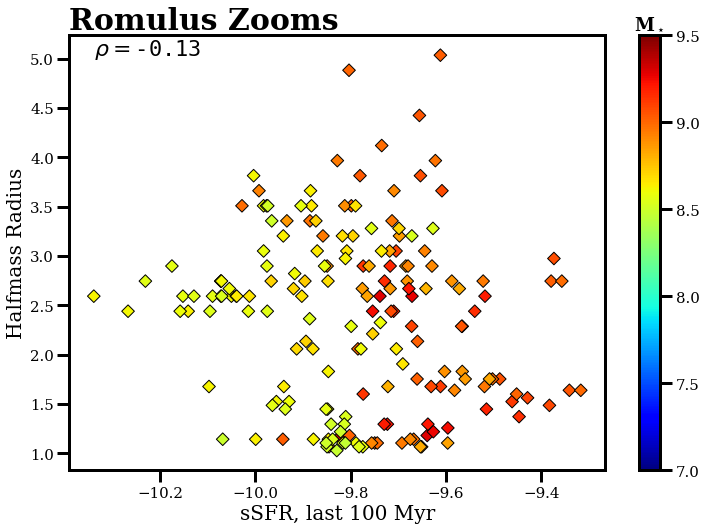

In [35]:
zmin = 0.00
zmax = 0.35

mmin = 6
mmax = 12
fig = plt.figure(facecolor='w', figsize=(12,8))

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=13)

# get data
ssfr = []
rhm = []
mall = []
for idx,gal in enumerate(cdmgals):
    if gal in [431, 615]: continue
    data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

    x = data['sSFR_100'][data['z'] <= zmax].to_numpy()
    y = data['R_halfmass'][data['z'] <= zmax].to_numpy()
    c = np.log10(data['M_star'][data['z'] <= zmax].to_numpy())
    z = data['z'][data['z']<= zmax].to_numpy()
    
    x = x[z>=zmin]
    y = y[z>=zmin]
    c = c[z>=zmin]
    
    x = x[c>=mmin]
    y = y[c>=mmin]
    c = c[c>=mmin]
    
    x = x[c<=mmax]
    y = y[c<=mmax]
    c = c[c<=mmax]
    
    for i,_ in enumerate(x):
        ssfr.append(x[i])
        rhm.append(y[i])
        mall.append(c[i])
        
rs = ss.spearmanr(ssfr, rhm)[0]
        
# scatter 
plt.scatter(ssfr, rhm, c=mall, cmap='jet', s=80, ec='k', marker='D', vmin=7.0, vmax=9.5)

plt.xlabel('sSFR, last 100 Myr', fontsize=20)
plt.ylabel(r'Halfmass Radius', fontsize=20)

#plt.xscale('log')

clb = plt.colorbar()
clb.ax.set_title(r'M$_\star$', fontsize=18, weight='bold')
clb.ax.tick_params(labelsize=15)

plt.title('Romulus Zooms', fontsize=30, weight='bold', loc='left')
#plt.title(str(mmin)+r'$\leq$M$_\star\leq$'+str(mmax), fontsize=22, weight='bold', loc='right')

numdig = 4
if rs<0: numdig=5
plt.text(x=min(ssfr), y=max(rhm), s=r'$\rho=$'+str(rs)[:numdig], fontsize=22, fontfamily='monospace')

ff = '../figures/breathingModes/ssfr100_SigYS_group/'+str(zmin)[:3]+'z'+str(zmax)[:3]+'.png'
#plt.savefig(ff)

## Mass Binning

<ipython-input-24-19f3b2f48642>:22: RuntimeWarning: divide by zero encountered in log10
  massmask = np.log10(np.array(data['M_star']))>= mstar_min
<ipython-input-24-19f3b2f48642>:23: RuntimeWarning: divide by zero encountered in log10
  mm = np.log10(np.array(data['M_star']))[massmask]
<ipython-input-24-19f3b2f48642>:22: RuntimeWarning: divide by zero encountered in log10
  massmask = np.log10(np.array(data['M_star']))>= mstar_min
<ipython-input-24-19f3b2f48642>:23: RuntimeWarning: divide by zero encountered in log10
  mm = np.log10(np.array(data['M_star']))[massmask]


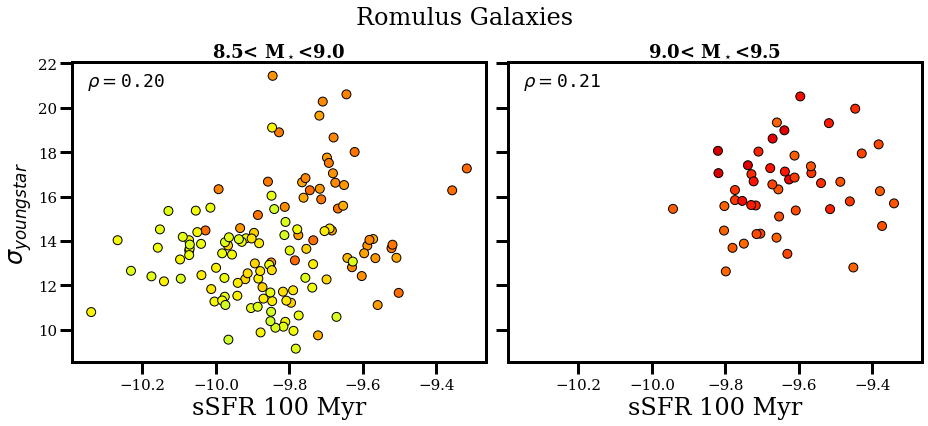

In [24]:
# SIG
fig, axs = plt.subplots(1,2, figsize=(13,6), facecolor='w', sharex=True, sharey=True)

zmin = 0.00
zmax = 0.35

#mbins = [7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
mbins = [8.5,9.0,9.5]

for i,ax in enumerate(axs):
    ssfr = []
    sigYS = []
    mall = []
    
    mstar_min = mbins[i]
    mstar_max = mbins[i+1]
    for idx,gal in enumerate(cdmgals):
        if gal in [431, 615]: continue
        
        data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')
        
        massmask = np.log10(np.array(data['M_star']))>= mstar_min
        mm = np.log10(np.array(data['M_star']))[massmask]
        x = np.array(data['sSFR_100'])[massmask]
        y = np.array(data['sigma_youngstar_los'])[massmask]
        z = np.array(data['z'])[massmask]

        massmask = mm<=mstar_max
        mm = mm[massmask]
        x = x[massmask]
        y = y[massmask]
        z = z[massmask]

        zmask = z>=zmin
        mm = mm[zmask]
        x = x[zmask]
        y = y[zmask]
        z = z[zmask]
        
        zmask = z<=zmax
        mm = mm[zmask]
        x = x[zmask]
        y = y[zmask]
        z = z[zmask]
        
        for j,_ in enumerate(x):
            ssfr.append(x[j])
            sigYS.append(y[j])
            mall.append(mm[j])
        
    ax.scatter(ssfr, sigYS, c=mall, cmap='jet', s=80, ec='k', vmin=7,vmax=9.5)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=13)

    p = ss.spearmanr(ssfr, sigYS)[0]
    ax.text(s=r'$\rho = $'+str(p)[:4], x=-10.35, y=21, fontsize=18, fontfamily='monospace')
    
    fs = 18
    ax.set_title(str(mstar_min)+'< M$_\star$<'+str(mstar_max), fontsize=fs, weight='bold')
    
# colorbar
#cax = make_axes_locatable(axs[-1]).append_axes('right', size='5%', pad=0.05)
#fig.colorbar(s, cax=cax, orientation='vertical')
#cax.set_title(r'M$_\star$', fontsize=12, weight='bold')
#cax.tick_params(axis='both', which='major', labelsize=12)
    
# prettify 
axs[0].set_xlabel('sSFR 100 Myr', fontsize=24)
axs[1].set_xlabel('sSFR 100 Myr', fontsize=24)
axs[0].set_ylabel(r'$\sigma_{youngstar}$', fontsize=24)

plt.suptitle('Romulus Galaxies', fontsize=24)

plt.tight_layout()

pf = '../figures/breathingModes/ssfr100_SigYS_group/binned2.png'
plt.savefig(pf)

/home/jw1624/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-63-e5bd25b002e4>:22: RuntimeWarning: divide by zero encountered in log10
  mm = np.log10(np.array(data['M_star']))[massmask]
/home/jw1624/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-63-e5bd25b002e4>:22: RuntimeWarning: divide by zero encountered in log10
  mm = np.log10(np.array(data['M_star']))[massmask]
/home/jw1624/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-63-e5bd25b002e4>:22: RuntimeWarning: divide by zero encountered in log10
  mm = np.log10(np.array(data['M_star']))[massmask]


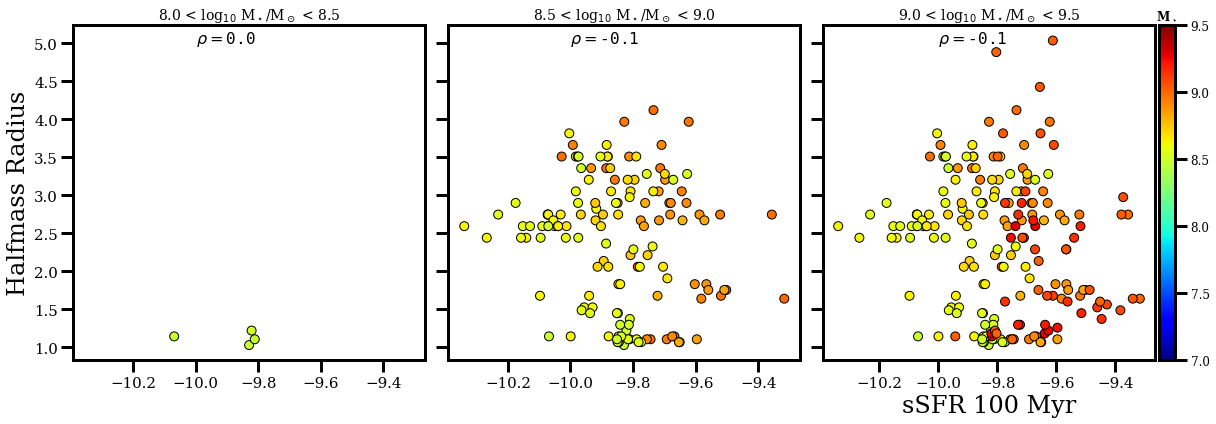

In [63]:
# RHM
fig, axs = plt.subplots(1,3, figsize=(17,6), facecolor='w', sharex=True, sharey=True)

zmin = 0.00
zmax = 0.35

#mbins = [7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
mbins = [8.0,8.5,9.0,9.5]

ssfr = []
rhm = []
mall = []
for i,ax in enumerate(axs):
    mstar_min = mbins[i]
    mstar_max = mbins[i+1]
    for idx,gal in enumerate(cdmgals):
        if gal in [431, 615]: continue
        
        data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')
        
        massmask = np.log10(data['M_star']) >= mstar_min
        mm = np.log10(np.array(data['M_star']))[massmask]
        x = np.array(data['sSFR_100'])[massmask]
        y = np.array(data['R_halfmass'])[massmask]
        z = np.array(data['z'])[massmask]

        massmask = mm<=mstar_max
        mm = mm[massmask]
        x = x[massmask]
        y = y[massmask]
        z = z[massmask]

        zmask = z<=zmax
        mm = mm[zmask]
        x = x[zmask]
        y = y[zmask]
        z = z[zmask]
        
        for j,_ in enumerate(x):
            ssfr.append(x[j])
            rhm.append(y[j])
            mall.append(mm[j])
        
    s=ax.scatter(ssfr, rhm, c=mall, cmap='jet', s=80, ec='k', vmin=7,vmax=9.5)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=13)

    p = ss.spearmanr(ssfr, rhm)[0]
    ax.text(s=r'$\rho = $'+str(p)[:4], x=-10.0, y=5.0, fontsize=16, fontfamily='monospace')
    
# colorbar
cax = make_axes_locatable(axs[-1]).append_axes('right', size='5%', pad=0.05)
fig.colorbar(s, cax=cax, orientation='vertical')
cax.set_title(r'M$_\star$', fontsize=12, weight='bold')
cax.tick_params(axis='both', which='major', labelsize=12)
    
# prettify 
axs[2].set_xlabel('sSFR 100 Myr', fontsize=24)
axs[0].set_ylabel('Halfmass Radius', fontsize=24)

fs = 14
axs[0].set_title('8.0 < log$_{10}$ M$_\star$/M$_\odot$ < 8.5', fontsize=fs)
axs[1].set_title('8.5 < log$_{10}$ M$_\star$/M$_\odot$ < 9.0', fontsize=fs)
axs[2].set_title('9.0 < log$_{10}$ M$_\star$/M$_\odot$ < 9.5', fontsize=fs)
#axs[3].set_title('8.5 < log$_{10}$ M$_\star$/M$_\odot$ < 9.0', fontsize=fs)
#axs[4].set_title('9.0 < log$_{10}$ M$_\star$/M$_\odot$ < 9.5', fontsize=fs)

plt.tight_layout()

pf = '../figures/keck/ssfr_100_hmr_binned_5.png'
#plt.savefig(pf)

## Plotting Several V_disp definitions
Alyson mentioned that the vdisp for young stars we are seeing is higher than she would have hoped

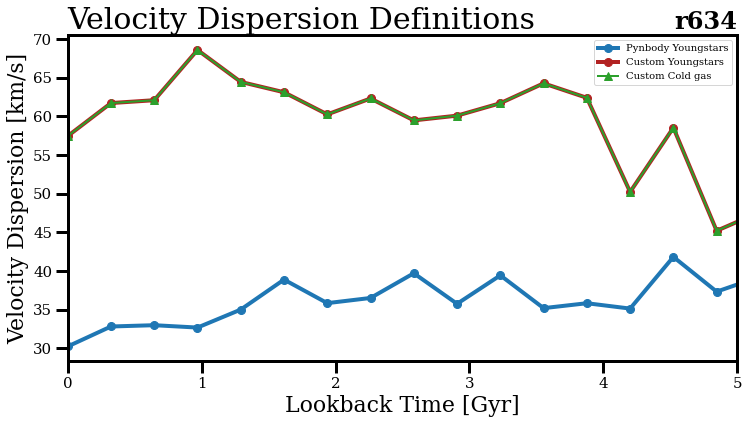

In [62]:
gal = cdmgals[15]
tlim = 5

# acquire data
data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')
tlookback = max(data['t']) - data['t']
tmask = tlookback<tlim+1

sigma_youngstar_pynbody = data['sigma_youngstar'][tmask]
sigma_youngstar_m = data['sigma_youngstar_m'][tmask]
sigma_coldgas = data['sigma_youngstar_m'][tmask]

tlookback = tlookback[tmask]

# set up figure 
fig = plt.figure(figsize=(12,6), facecolor='w')

# plot 
plt.plot(tlookback, sigma_youngstar_pynbody, linewidth=4, marker='o', markersize=8)
plt.plot(tlookback, sigma_youngstar_m, linewidth=4, marker='o', markersize=8, c='firebrick')
plt.plot(tlookback, sigma_coldgas, linewidth=2, marker='^', markersize=8, c='tab:green')

# prettify 
plt.tick_params(axis='both', which='major', labelsize=15)

plt.xlabel('Lookback Time [Gyr]', fontsize=22)
plt.ylabel('Velocity Dispersion [km/s]', fontsize=22)

plt.title('Velocity Dispersion Definitions', fontsize=30, loc='left')
plt.title('r'+str(gal), weight='bold', fontsize=24, loc='right')

plt.legend(['Pynbody Youngstars', 'Custom Youngstars', 'Custom Cold gas'])

plt.xlim([0,tlim])

plt.savefig('../figures/breathingModes/vdispDefns/r'+str(gal)+'.png')